In [2]:
import pandas as pd
import scipy as sp
import scipy.io as sio
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.utils import shuffle 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = sio.loadmat('data_xvector_embeddings.mat')

In [4]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Dec 12 19:30:41 2019',
 '__version__': '1.0',
 '__globals__': [],
 'devIVs': array([[-1.797777  , -2.321903  , -1.761098  , ..., -0.921178  ,
         -1.600282  , -1.297183  ],
        [ 0.06394109,  0.8769827 ,  2.489063  , ...,  0.5528077 ,
          0.3360161 ,  0.0678002 ],
        [ 0.6110049 , -0.172986  ,  1.281954  , ..., -0.2506203 ,
         -2.174027  , -1.383531  ],
        ...,
        [-1.312783  ,  0.1554961 , -0.4690425 , ..., -1.383113  ,
         -0.9053605 , -1.769014  ],
        [ 0.394021  ,  0.2806226 ,  2.623297  , ...,  1.586547  ,
          2.593764  ,  2.42562   ],
        [-0.2269614 , -0.2244875 ,  2.684852  , ...,  1.328748  ,
         -0.7272574 ,  1.281434  ]]),
 'labels': array([[ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 3],
        [ 3],
        [ 3],
    

In [5]:
list_labels =[] 
for i in data["labels"]:
    if i == 1 : 
        list_labels.append("audiobooks")
    if i == 2: 
        list_labels.append("broadcast_interview")
    if i == 3:
        list_labels.append("child")
    if i == 4:
        list_labels.append("clinical")
    if i == 5:
        list_labels.append("court")
    if i == 6:
        list_labels.append("maptask")
    if i == 7:
        list_labels.append("meeting")
    if i == 8:
        list_labels.append("restaurant")
    if i == 9:
        list_labels.append("socio_field")
    if i == 10:
        list_labels.append("socio_lab")
    if i == 11:
        list_labels.append("webvideo")

In [6]:
data["labels2"] = list_labels

In [7]:
data["labels2"]

['audiobooks',
 'audiobooks',
 'audiobooks',
 'audiobooks',
 'audiobooks',
 'audiobooks',
 'audiobooks',
 'audiobooks',
 'audiobooks',
 'audiobooks',
 'audiobooks',
 'audiobooks',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'child',
 'restaurant',
 'restaurant',
 'restaurant',
 'restaurant',
 'restaurant',
 'restaurant',
 'restaurant',
 'restaurant',
 'restaurant',
 'restaurant',
 'restaurant',
 'restaurant',
 'clinical',
 'clinical',
 'clinical',
 'clinical',
 'clinical',
 'clinical',
 'clinical',
 'clinical',
 'clinical',
 'clinical',
 'clinical',
 'clinical',
 'clinical',
 'clinical',
 'clinical',
 'clinical',
 'clinical',
 'clinical',
 'clinical',
 'clinical',
 'clinical',
 'clinical',
 'clinical',
 'clinical',
 'court',
 'court',
 'court',
 'court',
 'court',
 'court',
 'court',
 'court',
 'court',
 'court'

In [8]:
# add names of files
list_file_names = ['DH_000'+str(i) for i in range(1,10)]
list_file_names += ['DH_00'+str(i) for i in range(10,100)]
list_file_names += ['DH_0'+str(i) for i in range(100,193)]
print(list_file_names)

data['files'] = list_file_names

['DH_0001', 'DH_0002', 'DH_0003', 'DH_0004', 'DH_0005', 'DH_0006', 'DH_0007', 'DH_0008', 'DH_0009', 'DH_0010', 'DH_0011', 'DH_0012', 'DH_0013', 'DH_0014', 'DH_0015', 'DH_0016', 'DH_0017', 'DH_0018', 'DH_0019', 'DH_0020', 'DH_0021', 'DH_0022', 'DH_0023', 'DH_0024', 'DH_0025', 'DH_0026', 'DH_0027', 'DH_0028', 'DH_0029', 'DH_0030', 'DH_0031', 'DH_0032', 'DH_0033', 'DH_0034', 'DH_0035', 'DH_0036', 'DH_0037', 'DH_0038', 'DH_0039', 'DH_0040', 'DH_0041', 'DH_0042', 'DH_0043', 'DH_0044', 'DH_0045', 'DH_0046', 'DH_0047', 'DH_0048', 'DH_0049', 'DH_0050', 'DH_0051', 'DH_0052', 'DH_0053', 'DH_0054', 'DH_0055', 'DH_0056', 'DH_0057', 'DH_0058', 'DH_0059', 'DH_0060', 'DH_0061', 'DH_0062', 'DH_0063', 'DH_0064', 'DH_0065', 'DH_0066', 'DH_0067', 'DH_0068', 'DH_0069', 'DH_0070', 'DH_0071', 'DH_0072', 'DH_0073', 'DH_0074', 'DH_0075', 'DH_0076', 'DH_0077', 'DH_0078', 'DH_0079', 'DH_0080', 'DH_0081', 'DH_0082', 'DH_0083', 'DH_0084', 'DH_0085', 'DH_0086', 'DH_0087', 'DH_0088', 'DH_0089', 'DH_0090', 'DH_0091'

In [9]:
list1 = data["devIVs"].transpose()

In [10]:
list1 = list1.tolist()

In [11]:
data2 = pd.DataFrame()

In [12]:
data2["devIVs"] =list1
data2["labels2"] = data["labels2"]
data2['files'] = data['files']

In [13]:
data2

,devIVs,labels2,files
0,"[-1.797777, 0.06394109, 0.6110049, 2.059658, -...",audiobooks,DH_0001
1,"[-2.321903, 0.8769827, -0.172986, -0.6560634, ...",audiobooks,DH_0002
2,"[-1.761098, 2.489063, 1.281954, -0.629913, 0.9...",audiobooks,DH_0003
3,"[-1.413769, 1.598151, 2.860205, -1.543402, 0.8...",audiobooks,DH_0004
4,"[-1.627785, 0.931557, 2.019412, -1.43913, 1.02...",audiobooks,DH_0005
...,...,...,...
187,"[-1.648024, -0.2932833, -1.557863, -0.4835897,...",broadcast_interview,DH_0188
188,"[-1.949884, 0.1879981, -2.155498, -0.01495025,...",broadcast_interview,DH_0189
189,"[-0.921178, 0.5528077, -0.2506203, -0.2570134,...",broadcast_interview,DH_0190
190,"[-1.600282, 0.3360161, -2.174027, 0.6307677, -...",broadcast_interview,DH_0191


In [14]:
data2= shuffle(data2)

In [15]:
numpy_array = np.array(data2['devIVs'])
Vec = numpy_array.transpose()

Vec.shape

(192,)

In [16]:
Vec.shape

(192,)

### Create a panda data frame that contains two columns "data" and thier lables

In [17]:
X = list(Vec)
X[0]

[-0.08950377,
 0.8528235,
 0.5079927,
 -0.2985378,
 0.04779569,
 2.950588,
 0.700322,
 2.753524,
 2.995754,
 1.122681,
 -0.03912392,
 0.3550135,
 0.753078,
 1.398314,
 -1.828389,
 -0.106227,
 0.1893408,
 -0.9834437,
 2.045829,
 1.901493,
 -1.712898,
 0.6268476,
 0.1520158,
 2.406459,
 -0.007172959,
 -1.153893,
 -2.051618,
 2.104782,
 4.187946,
 -0.4872002,
 0.2038059,
 2.857007,
 0.1820083,
 0.476037,
 -1.435536,
 0.9877938,
 -1.431449,
 -1.419359,
 -0.6482213,
 -0.02129224,
 0.7880893,
 0.5302207,
 1.418488,
 3.340336,
 1.048179,
 -0.1649708,
 -0.01109658,
 1.942447,
 2.428225,
 0.8023838,
 0.9076585,
 0.1816995,
 1.87914,
 0.2673206,
 -0.2583205,
 1.043182,
 0.8972991,
 -1.891368,
 -0.4915271,
 1.712626,
 0.1715726,
 -0.1021892,
 -0.3055785,
 3.388817,
 0.2379372,
 0.3372741,
 0.6632873,
 1.052324,
 -0.0113273,
 2.463491,
 0.2223033,
 -0.7510009,
 0.2688812,
 0.8786599,
 1.001074,
 1.712042,
 2.76484,
 3.365506,
 2.76644,
 1.227594,
 2.050822,
 -0.8418529,
 1.043654,
 -0.6291593,
 -0

### Training a k-means clustering model 

In [18]:
# YOUR CODE HERE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Create a KMeans clustering object
km = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300000,
    n_clusters=4, n_init=13, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)
X_std = StandardScaler().fit_transform(X)
km.fit(X_std)

# Print out the predicted labels
predicted_labels = km.labels_

clusters = predicted_labels.tolist()

centroids  = km.cluster_centers_  #means of shape [10,] 

centroid_labels = [centroids[i] for i in predicted_labels]

In [19]:
predicted_labels

array([1, 1, 0, 3, 2, 3, 2, 2, 1, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 2, 0,
       0, 2, 1, 3, 1, 2, 1, 3, 2, 0, 3, 0, 2, 2, 3, 3, 0, 3, 1, 2, 3, 2,
       1, 3, 2, 1, 3, 3, 3, 2, 2, 1, 0, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 3,
       3, 2, 0, 2, 1, 3, 1, 2, 3, 3, 1, 3, 3, 2, 3, 2, 1, 2, 1, 0, 0, 1,
       3, 0, 2, 3, 1, 2, 2, 3, 0, 3, 3, 3, 2, 0, 2, 1, 3, 2, 3, 2, 3, 3,
       2, 2, 1, 1, 3, 2, 3, 1, 2, 3, 3, 3, 1, 3, 1, 3, 3, 0, 3, 1, 3, 0,
       1, 3, 3, 0, 0, 0, 2, 1, 3, 3, 3, 3, 2, 1, 0, 1, 1, 3, 0, 0, 2, 2,
       1, 1, 0, 2, 3, 0, 1, 3, 1, 3, 1, 3, 0, 3, 0, 2, 3, 3, 0, 1, 3, 3,
       2, 1, 3, 2, 2, 2, 0, 3, 2, 3, 3, 1, 1, 3, 3, 3], dtype=int32)

### Inspecting Clustering Results

In [20]:
X_std

array([[ 0.44299547,  1.30631419,  0.2526183 , ...,  1.09121132,
        -1.50302477, -0.05499103],
       [ 0.57549179,  0.42521889, -0.11750635, ...,  0.50858908,
        -0.36738907, -0.67146016],
       [-0.30554826, -1.06006976,  1.00004465, ..., -1.06139335,
        -2.7671386 , -1.74646183],
       ...,
       [ 0.03645074, -1.27667176,  0.44354581, ...,  1.13671537,
        -1.30788363,  0.37188655],
       [ 1.43563285, -1.03397566,  0.25901984, ...,  0.36670011,
         1.486357  , -0.57939762],
       [-0.11552017, -0.20413031,  1.4024243 , ..., -0.38694834,
        -0.42513416, -0.20335869]])

### plot the clusters 

In [21]:
from sklearn.manifold import TSNE

In [22]:
model = TSNE(n_components = 2,random_state = 0)

In [23]:
tsne_data = model.fit_transform(X_std)

In [24]:
tsne_data.shape

(192, 2)

In [25]:
tsne_data

array([[ 1.09179556e+00,  4.96989202e+00],
       [ 4.35452318e+00, -5.79279900e+00],
       [ 8.16465569e+00,  5.16221142e+00],
       [ 1.37026272e+01,  4.30840874e+00],
       [-1.44604454e+01, -1.87120044e+00],
       [ 1.33478556e+01,  3.86859798e+00],
       [-1.04021854e+01,  1.72020781e+00],
       [-1.21471920e+01, -2.29442000e+00],
       [ 1.09160578e+00,  4.94945717e+00],
       [ 1.08437157e+00, -3.78503990e+00],
       [ 3.38098693e+00, -8.84611511e+00],
       [-5.12012863e+00, -4.87601376e+00],
       [-1.40118456e+01, -1.89504778e+00],
       [ 1.12971077e+01, -4.12152082e-01],
       [ 6.36384106e+00, -6.85203981e+00],
       [ 2.20325470e+00, -8.42865372e+00],
       [-2.08787179e+00,  9.63442624e-01],
       [-5.78416491e+00, -1.99788523e+00],
       [ 2.39159727e+00, -6.10322762e+00],
       [-3.71719623e+00, -2.46148086e+00],
       [-9.93321228e+00, -3.61142445e+00],
       [ 6.61061621e+00,  7.00632000e+00],
       [ 1.36251259e+00,  5.85194397e+00],
       [-9.

In [26]:
df_subset =pd.DataFrame() 
df_subset['tsneone'] = tsne_data[:,0]
df_subset['tsnetwo'] = tsne_data[:,1]
df_subset['y'] = predicted_labels
df_subset["labels"]= data["labels2"]
df_subset['files'] = data["files"]

In [27]:
df_subset.head()

,tsneone,tsnetwo,y,labels,files
0,1.091796,4.969892,1,audiobooks,DH_0001
1,4.354523,-5.792799,1,audiobooks,DH_0002
2,8.164656,5.162211,0,audiobooks,DH_0003
3,13.702627,4.308409,3,audiobooks,DH_0004
4,-14.460445,-1.871200,2,audiobooks,DH_0005


In [56]:
# to get the name files of each clusters
name_files_group0 = df_subset.query('y==0')['files']
name_files_group1 = df_subset.query('y==1')['files']
name_files_group2 = df_subset.query('y==2')['files']
name_files_group3 = df_subset.query('y==3')['files']

print(name_files_group3[60:])

185    DH_0186
186    DH_0187
189    DH_0190
190    DH_0191
191    DH_0192
Name: files, dtype: object


In [29]:
df_subset.count

<bound method DataFrame.count of        tsneone   tsnetwo  y               labels    files
0     1.091796  4.969892  1           audiobooks  DH_0001
1     4.354523 -5.792799  1           audiobooks  DH_0002
2     8.164656  5.162211  0           audiobooks  DH_0003
3    13.702627  4.308409  3           audiobooks  DH_0004
4   -14.460445 -1.871200  2           audiobooks  DH_0005
..         ...       ... ..                  ...      ...
187  -7.688829 -4.617395  1  broadcast_interview  DH_0188
188   2.316129 -2.848725  1  broadcast_interview  DH_0189
189  12.323861 -3.661679  3  broadcast_interview  DH_0190
190   8.977901 -6.302371  3  broadcast_interview  DH_0191
191  12.889550  3.156885  3  broadcast_interview  DH_0192

[192 rows x 5 columns]>

In [30]:
groups = df_subset.groupby(['y'])

In [31]:
groups.count()

,tsneone,tsnetwo,labels,files
y,,,,
0,28,28,28,28
1,50,50,50,50
2,49,49,49,49
3,65,65,65,65


In [32]:
group1 = groups.get_group(1).groupby('labels').count()

In [33]:
group1

,tsneone,tsnetwo,y,files
labels,,,,
audiobooks,5,5,5,5
broadcast_interview,2,2,2,2
child,9,9,9,9
clinical,7,7,7,7
court,3,3,3,3
maptask,4,4,4,4
meeting,3,3,3,3
restaurant,2,2,2,2
socio_field,3,3,3,3


In [34]:
group2 = groups.get_group(2).groupby('labels').count()

In [35]:
group3 = groups.get_group(3).groupby('labels').count()

In [36]:
group0 = groups.get_group(0).groupby('labels').count()

### clusters and labels 


In [37]:
clusters_labels = pd.DataFrame()

In [38]:
clusters_labels["cluster_1"]=groups.get_group(0).groupby('labels')["labels"].count()
clusters_labels["cluster_2"]=groups.get_group(1).groupby('labels')["labels"].count()
clusters_labels["cluster_3"]=groups.get_group(2).groupby('labels')["labels"].count()
clusters_labels["cluster_4"]=groups.get_group(3).groupby('labels')["labels"].count()

In [39]:
clusters_labels.fillna(0)

,cluster_1,cluster_2,cluster_3,cluster_4
labels,,,,
audiobooks,1,5,4.0,2
broadcast_interview,1,2,3.0,6
child,4,9,6.0,4
clinical,3,7,9.0,5
maptask,5,4,7.0,7
restaurant,1,2,4.0,5
socio_field,2,3,0.0,7
socio_lab,4,4,2.0,6
webvideo,7,8,6.0,11


In [40]:
#the percentege of each catpd.DataFrame()agry in each cluster 
clusters_labels_percent = pd.DataFrame()
clusters_labels_percent["cluster_1"]= clusters_labels["cluster_1"]/clusters_labels.sum(axis=1)
clusters_labels_percent["cluster_2"]= clusters_labels["cluster_2"]/clusters_labels.sum(axis=1)
clusters_labels_percent["cluster_3"]= clusters_labels["cluster_3"]/clusters_labels.sum(axis=1)
clusters_labels_percent["cluster_4"]= clusters_labels["cluster_4"]/clusters_labels.sum(axis=1)

In [41]:
clusters_labels_percent.fillna(0)

,cluster_1,cluster_2,cluster_3,cluster_4
labels,,,,
audiobooks,0.083333,0.416667,0.333333,0.166667
broadcast_interview,0.083333,0.166667,0.250000,0.500000
child,0.173913,0.391304,0.260870,0.173913
clinical,0.125000,0.291667,0.375000,0.208333
maptask,0.217391,0.173913,0.304348,0.304348
restaurant,0.083333,0.166667,0.333333,0.416667
socio_field,0.166667,0.250000,0.000000,0.583333
socio_lab,0.250000,0.250000,0.125000,0.375000
webvideo,0.218750,0.250000,0.187500,0.343750


In [42]:
clusters_labels_percent.to_csv("clusters_percentage",index=True)

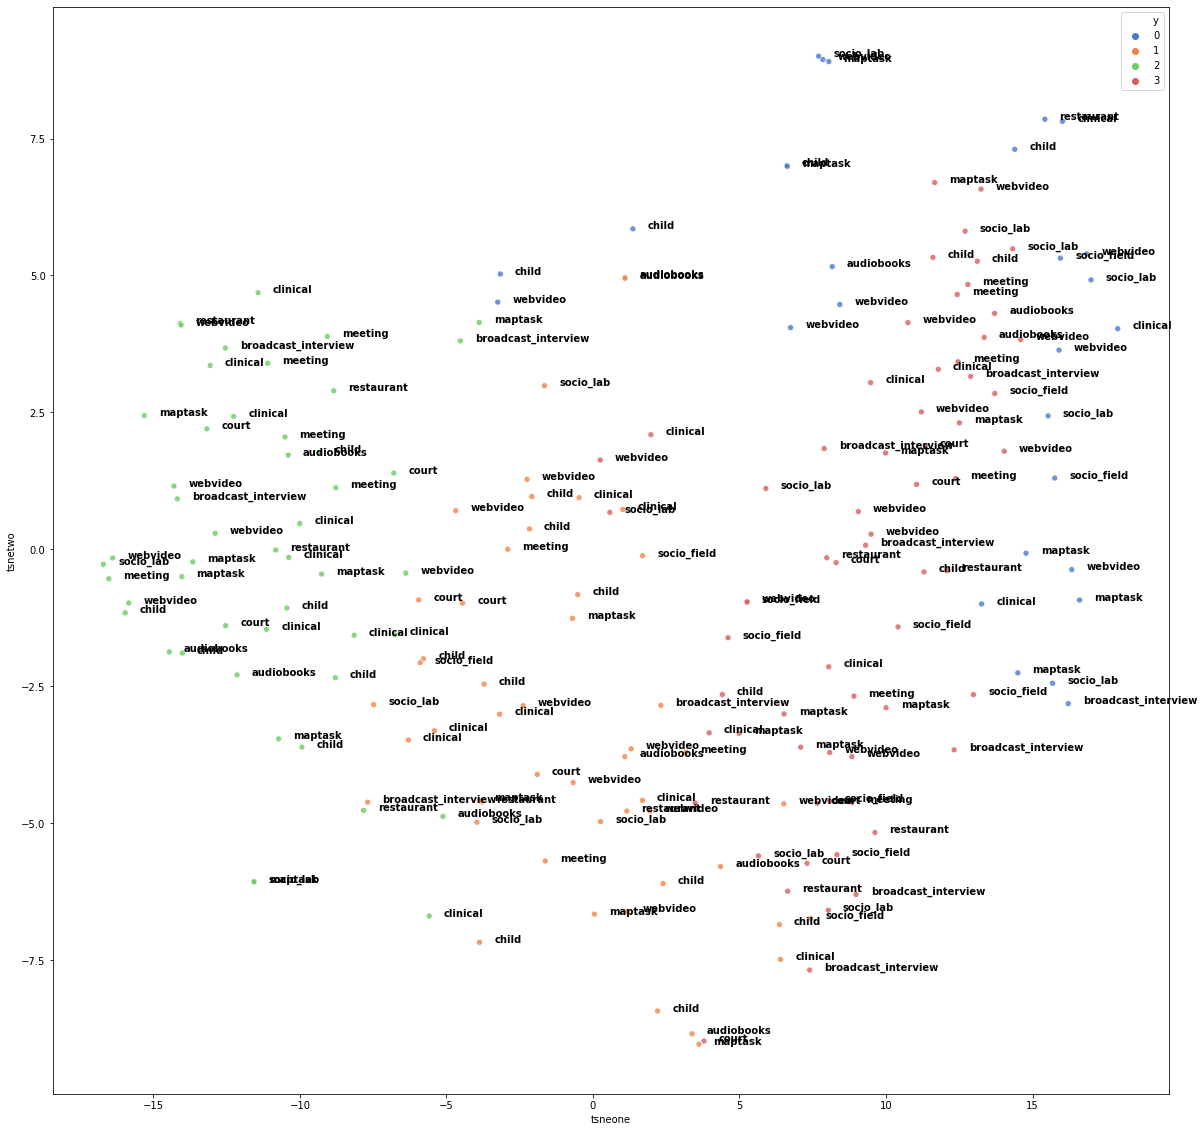

In [43]:
plt.figure(figsize=(20,20))
p1 = sns.scatterplot(
    x="tsneone", y="tsnetwo",
    hue="y",
    palette=sns.color_palette("muted", 4),
    data=df_subset,
    legend="full",
    alpha=0.8
)


for line in range(0,df_subset.shape[0]):
     p1.text(df_subset.tsneone[line]+0.5, df_subset.tsnetwo[line], df_subset.labels[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

### Evaluate the model 